#### 买家
1. 买家购买的二手商品种类分布
2. 买家关注因素

#### 卖家
1. 卖家身份分布
2. 卖家售卖商品种类分布
3. 动机分布

### 未使用者基本情况
1. 是否有需求分布
2. 是否知道分布


In [78]:
import pandas as pd
import csv

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import numpy
import scipy

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

excel_path = '../data/全部问卷信息.xlsx'
df_buyers = pd.read_excel(excel_path, sheet_name='买家重编码')
df_sellers = pd.read_excel(excel_path, sheet_name='卖家重编码')
df_unused = pd.read_excel(excel_path, sheet_name='未使用重编码')

In [79]:
display("买家数据前5行: ", df_buyers.head())
print("------------------------------------------------------------------")
display("卖家数据前5行: ", df_sellers.head())
print("------------------------------------------------------------------")
display("未使用二手平台的受调查者数据前5行: ", df_unused.head())

'买家数据前5行: '

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1、您的性别为：,2、您的年龄为：,3、您的学历为：,4、您目前从事的职业为：,5、您的月收入区间为：,6、您是否使用过二手交易平台？,12、您倾向于购买什么类型的二手商品？,12、书籍资料,12、数码电器,12、运动产品,12、服饰配饰,12、虚拟产品,12、家具用品,12、交通工具,12、其它,13、当您要购买二手商品时，以下因素对您来说有多重要？（分值越高表示越重要）—商品质量,13、商品信息全面,13、物流服务,13、价格优惠,13、商品销量,13、售后服务,14、您是否关注二手商品的原始购买渠道？,15、您是否关注二手商品在平台上的价格波动情况？,16、卖家在平台上的声誉会影响您是否选择与其交易吗？,17、卖家的好评率对您的购买决策影响大吗？,18、卖家的交易纠纷数量对您的购买决策影响大吗？,19、您更关注卖家的声誉还是卖家自身的交易纠纷数量？,20、卖家的售后服务对您的购买决策影响大吗？,21、您认为应包含哪些售后服务？,21、客户咨询响应,21、商品使用指导,21、提供维修信息,21、一定期限内退换货,22、您是否会因为担心个人信息安全问题，在二手平台上减少某些交易行为？,23、店铺信誉造假、商品销量与评论造假等商品风险问题是否会影响您的购买决策？,24、您是否遇到过平台上商品信息与实际收到商品严重不符的情形？,25、您认为平台通过哪些方式可以减小交易风险？,25、建立买卖双方交易信誉记录,25、交易前缴纳适额保证金,25、建立商品评级标准,26、对于平台现有的纠纷处理时间周期，您是否满意？,27、平台提供的商品筛选功能是否满足您的需求？,28、您在使用二手平台购物的过程中，最满意/不满意的一次购物经历1怎样的？交易过程中让您感到满意/不满意的因素1什么？,29、您对二手平台的改进有哪些期望？
0,2,2025/2/5 21:28:25,134秒,手机提交,直接访问,223.104.72.229(广东-中山),20,0,50,3,2,5,1,书籍资料,1,0,0,0,0,0,0,NaN,3,3,3,5,3,3,2,3,5,5,5,2,4,客户咨询响应,1,0,0,0,3,3,3,建立买卖双方交易信誉记录,1,0,0,3,3,NaN,NaN
1,7,2025/2/5 21:34:33,86秒,手机提交,直接访问,42.229.253.203(河南-南阳),28,1,19,3,1,1,1,数码电器┋运动用品┋服饰配饰┋虚拟产品┋家居用品,0,1,0,1,1,1,0,NaN,5,4,4,5,5,5,2,3,5,5,4,0,4,一定期限内退换货┋提供维修信息┋商品使用指导┋客户咨询响应,1,1,1,1,3,3,3,建立买卖双方交易信誉记录┋交易前缴纳适额保证金┋建立商品评级标准,1,1,1,3,3,NaN,NaN
2,9,2025/2/5 21:36:57,72秒,手机提交,直接访问,42.49.217.186(湖南-益阳),19,0,19,2,1,1,1,书籍资料┋数码电器,1,1,0,0,0,0,0,NaN,5,3,3,4,2,2,3,2,5,5,4,0,4,提供维修信息┋商品使用指导,0,1,1,0,3,3,4,建立买卖双方交易信誉记录┋交易前缴纳适额保证金┋建立商品评级标准,1,1,1,3,2,NaN,NaN
3,12,2025/2/5 21:45:49,125秒,手机提交,直接访问,112.18.125.150(四川-遂宁),26,1,18,3,1,1,1,书籍资料┋数码电器,1,1,0,0,0,0,0,NaN,5,5,4,5,3,4,3,3,5,4,5,1,3,一定期限内退换货┋提供维修信息┋商品使用指导┋客户咨询响应,1,1,1,1,2,5,2,建立买卖双方交易信誉记录┋建立商品评级标准,1,0,1,3,3,NaN,NaN
4,13,2025/2/5 21:46:19,87秒,微信,NaN,140.243.1.212(福建-厦门),25,1,20,2,1,2,1,服饰配饰┋家居用品,0,0,0,1,0,1,0,NaN,5,5,3,5,4,3,3,3,5,5,5,0,3,一定期限内退换货,0,0,0,1,3,5,2,建立买卖双方交易信誉记录┋交易前缴纳适额保证金┋建立商品评级标准,1,1,1,4,4,NaN,NaN


------------------------------------------------------------------


'卖家数据前5行: '

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1、您的性别为：,2、您的年龄为：,3、您的学历为：,4、您目前从事的职业为：,5、您的月收入区间为：,6、您是否使用过二手交易平台？,30、您目前的卖家身份属于以下哪种类型？,31、您主要出售的二手商品类型有哪些？,30、书籍资料,30、数码电器,30、运动用品,30、服饰配饰,30、虚拟产品,30、家居用品,30、交通工具,30、其他,32、您出售二手商品的主要动机是什么？,32、获取额外收入,32、减少闲置商品,32、支持环保或可持续消费,32、为换够新物品筹集资金,32、改善生活环境（如清理空间等）,33、您认为二手平台与其他出售商品的渠道相比，优势是什么？,33、平台受众人群广泛，成交率高,33、平台受众人群广泛，成交率高.1,33、平台提供销售决策帮助，如定价、查看买家信用等,33、平台交易流程快，可以快速变现,33、操作简便，易于上手,34、您通常使用哪些二手平台？,34、闲鱼,34、转转,34、爱回收,34、得物,34、红布林,35、您是怎样作出定价这一销售决策的呢？,36、在二手平台上销售时，您遇到过哪些信息搜集上的挑战？,37、您认为平台可以通过哪些措施来提高买家的信任，从而提升您的销售转化率？,38、二手平台收取服务费上涨，您认为这对您的交易意愿有何影响？,39、假设您发现另一个收费更低，服务相似或更优的平台，您是否会考虑转移到该平台？,40、您做出销售决策时，最重要的决定因素是什么？,41、您在做销售决策时，平台能否提供需要的辅助决策工具？,42、您在进行销售决策时会考虑通过什么方式吸引潜在买家？,43、您是否觉得平台为你的商品提供了合适的曝光度？,44、您在交易过程中遇到过哪些问题？,45、您是否觉得平台在交易环节的监管自由度合适？,46、您最希望平台在哪些方面进行改进？
0,4,2025/2/5 21:32:01,195秒,手机提交,直接访问,117.136.98.146(广西-柳州),0,0,19,3,1,1,1,1,服饰配饰,0,0,0,1,0,0,0,NaN,减少闲置商品,0,1,0,0,0,平台保障性更高，可以约束买家不诚信行为┋平台受众人群广泛，成交率高,1,1,0,0,0,闲鱼,1,0,0,0,0,0,部分圈子存在行业术语，理解有困难,放宽对违规词的限制，增加普通商品曝光率→认证商品，如序列号、生产日期、型号等→加强对出售伪劣...,部分影响，理解收费上涨，但会重新评估交易频率和价格策略,转移意向高，继续留存需要平台提供额外的补偿或激励,买家信誉→交易安全性→价格→平台服务,平台依据商品提供参考价格,价格优惠，低于同类产品,否，我觉得曝光度不够，商品很少被浏览,买家频繁砍价且议价幅度大,是，我觉得监管自由度适中，保障了交易安全且操作便捷,平台与专门快递公司合作，便利卖家发货→加强客服处理纠纷的能力→适度减少服务费，对大额交易设定...
1,24,2025/2/5 22:21:23,141秒,微信,NaN,111.49.148.112(宁夏-固原),0,0,19,3,1,1,1,1,书籍资料,1,0,0,0,0,0,0,NaN,支持环保或可持续消费,0,0,1,0,0,平台提供销售决策帮助，如定价、查看买家信用等,0,0,1,0,0,闲鱼,1,0,0,0,0,1,部分圈子存在行业术语，理解有困难,放宽对违规词的限制，增加普通商品曝光率→认证商品，如序列号、生产日期、型号等→加强对出售伪劣...,部分影响，理解收费上涨，但会重新评估交易频率和价格策略,会立即转移，并减少在现平台的交易,买家信誉→平台服务→交易安全性→价格,以上都没有,价格优惠，低于同类产品,部分商品曝光度足够，但部分商品几乎没有浏览量,买家频繁砍价且议价幅度大,是，我觉得监管自由度适中，保障了交易安全且操作便捷,完善买卖双方的信誉系统，加大对逃单用户的惩罚力度
2,27,2025/2/5 23:30:20,174秒,微信,NaN,171.82.58.121(湖北-武汉),0,0,无,5,4,5,1,3,书籍资料┋运动用品┋交通工具,1,0,1,0,0,0,1,NaN,获取额外收入┋减少闲置商品┋为换购新物品筹集资金┋改善生活环境（如清理空间等）,1,1,0,0,1,平台保障性更高，可以约束买家不诚信行为┋平台交易流程快，可以快速变现┋操作简便，易于上手,1,0,0,1,1,闲鱼┋红布林,1,0,0,0,1,1,买家信用信息不透明┋不同二手平台上商品价格不一致,加强对出售伪劣产品等不诚信卖家的惩罚机制→完善客服服务，妥善处理买卖双方的矛盾→放宽对违规词...,严重影响，由于收费上涨产生对平台的不满，考虑停止交易或转移平台,转移意向低，现平台已建立足够的客户基础，且提供的服务较为满意,买家信誉→平台服务→价格→交易安全性,平台提供买家的信用记录┋平台依据商品提供参考价格,价格优惠，低于同类产品┋针对买家的关注点，详细阐明物品情况,是，我觉得曝光度足够，商品能被充分浏览,买家频繁砍价且议价幅度大┋买家付款后迟迟不确认收货┋售后争议处理不公平┋以上都没有,否，我觉得监管过于宽松，容易导致买卖双方的不诚信行为（如欺诈、恶意退货等）,平台与专门快递公司合作，便利卖家发货→平台提供捐赠或者环保回收的渠道→适度减少服务费，对大额...
3,30,2025/2/5 23:30:51,202秒,微信,NaN,117.152.75.128(湖北-武汉),0,0,无,3,4,5,1,3,书籍资料,1,0,0,0,0,0,0,NaN,获取额外收入┋减少闲置商品┋支持环保或可持续消费┋为换购新物品筹集资金,1,1,1,0,0,平台保障性更高，可以约束买家不诚信行为┋平台受众人群广泛，成交率高┋平台提供销售决策帮助，如...,1,1,1,1,1,闲鱼┋转转┋爱回收┋红布林,1,1,1,0,1,1,难以获得可靠的商品行情数据作为参考,放宽对违规词的限制，增加普通商品曝光率→加强对出售伪劣产品等不诚信卖家的惩罚机制→平台给买家...,较大影响，觉得平台收费过度上涨，会减少交易量,转移意向低，现平台已建立足够的客户基础，且提供的服务较为满意,交易安全性→平台服务→买家信誉→价格,平台提供买家的信用记录┋平台依据商品提供参考价格┋长时间无法售出，平台会询问是否要打折出售┋...,价格优惠，低于同类产品┋通过其他社交媒体宣传┋包装物品，使之更有吸引力┋针对买家的关注点，详...,部分商品曝光度足够，但部分商品几乎没有浏览量,买家频繁砍价且议价幅度大┋买家付款后迟迟不确认收货┋商品被恶意退货或差评┋平台抽佣或手续费过...,否，我觉得监管过于严格，限制了交易的灵活性,完善买卖双方的信誉系统，加大对逃单用户的惩罚力度→平台提供捐赠或者环保回收的渠道→加强客服处...
4,35,2025/2/5 23:31:46,339秒,微信,NaN,27.19.188.254(湖北-武汉),0,1,无,2,4,5,1,3,数码电器┋交通工具,0,1,0,0,0,0,1,NaN,改善生活环境（如清理空间等）,0,0,0,0,1,平台保障性更高，可以约束买家不诚信行为┋平台提供销售决策帮助，如定价、查看买家信用等┋操作简...,1,0,1,0,1,闲鱼┋转转┋爱回收┋红布林,1,1,1,0,1,1,平台运作模式复杂，操作有门槛┋部分圈子存在行业术语，理解有困难┋难以获得可靠的商品行情数据作...,加强对出售伪劣产品等不诚信卖家的惩罚机制→认证商品，如序列号、生产日期、型号等→放宽对违规词...,较大影响，觉得平台收费过度上涨，会减少交易量,转移意向低，现平台已建立足够的客户基础，且提供的服务较为满意,平台服务→价格→买家信誉→交易安全性,平台提供买家的信用记录┋平台依据商品提供参考价格┋以上都没有,价格优惠，低于同类产品┋通过其他社交媒体宣传┋包装物品，使之更有吸引力┋针对买家的关注点，详...,否，我觉得曝光度不够，商品很少被浏览,买家频繁砍价且议价幅度大┋买家付款后迟迟不确认收货┋商品被恶意退货或差评┋平台抽佣或手续费过...,否，我觉得监管过于严格，限制了交易的灵活性,平台与专门快递公司合作，便利卖家发货→平台提供捐赠或者环保回收的渠道→增加对卖家的帮助，如定...


------------------------------------------------------------------


'未使用二手平台的受调查者数据前5行: '

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,1、您的性别为：,2、您的年龄为：,3、您的学历为：,4、您目前从事的职业为：,5、您的月收入区间为：,6、您是否使用过二手交易平台？,7、您是否有转让或出售闲置物品的需求？,8、您是否知道一些常见的二手平台？（如闲鱼、转转等）,9、您不使用二手平台的原因是什么？,10、您认为平台做出哪些改进之后，您最可能会尝试使用二手交易平台？
0,1,2025/2/5 21:26:57,52秒,手机提交,直接访问,223.104.121.64(湖北-武汉),0,0,17,3,1,1,否,是,是,不熟悉二手平台的交易流程┋担心商品质量问题┋售后保障方面的担忧,加强商品质量、来源监管→提供更方便的物流服务→建立完善的买卖纠纷处理通道
1,3,2025/2/5 21:30:03,37秒,手机提交,直接访问,171.40.117.240(湖北-孝感),0,0,19,2,1,2,否,是,是,更倾向于购买全新的产品┋不熟悉二手平台的交易流程┋通过qq等其他渠道进行交易,加强用户信息安全保护→加强商品质量、来源监管→建立完善的买卖纠纷处理通道→完善买卖双方信用机...
2,5,2025/2/5 21:32:18,21秒,手机提交,直接访问,59.174.126.64(湖北-武汉),0,1,18,3,1,1,否,是,是,更倾向于购买全新的产品┋担心商品质量问题,建立完善的买卖纠纷处理通道
3,6,2025/2/5 21:32:45,134秒,手机提交,直接访问,223.104.122.248(湖北-武汉),0,1,18,3,1,1,否,是,是,不熟悉二手平台的交易流程,完善买卖双方信用机制→加强用户信息安全保护→加强商品质量、来源监管→提供价格优惠→建立完善的...
4,8,2025/2/5 21:35:32,39秒,手机提交,直接访问,42.229.253.203(河南-南阳),0,1,19,3,1,1,否,是,是,更倾向于购买全新的产品┋担心商品质量问题┋价格吸引力不足┋售后保障方面的担忧┋缺少信任的品牌或平台,加强用户信息安全保护→提供价格优惠→加强商品质量、来源监管→建立完善的买卖纠纷处理通道→提供...


## 未使用者分析

In [80]:
df_unused.columns

Index(['序号', '提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '总分', '1、您的性别为：',
       '2、您的年龄为：', '3、您的学历为：', '4、您目前从事的职业为：', '5、您的月收入区间为：',
       '6、您是否使用过二手交易平台？', '7、您是否有转让或出售闲置物品的需求？', '8、您是否知道一些常见的二手平台？（如闲鱼、转转等）',
       '9、您不使用二手平台的原因是什么？', '10、您认为平台做出哪些改进之后，您最可能会尝试使用二手交易平台？'],
      dtype='object')

In [81]:
df_unused = df_unused[['7、您是否有转让或出售闲置物品的需求？', '8、您是否知道一些常见的二手平台？（如闲鱼、转转等）','9、您不使用二手平台的原因是什么？']].rename(columns={'7、您是否有转让或出售闲置物品的需求？': '是否有需求', '8、您是否知道一些常见的二手平台？（如闲鱼、转转等）': '是否知道平台', '9、您不使用二手平台的原因是什么？': '不使用原因'})
df_unused

,是否有需求,是否知道平台,不使用原因
0,是,是,不熟悉二手平台的交易流程┋担心商品质量问题┋售后保障方面的担忧
1,是,是,更倾向于购买全新的产品┋不熟悉二手平台的交易流程┋通过qq等其他渠道进行交易
2,是,是,更倾向于购买全新的产品┋担心商品质量问题
3,是,是,不熟悉二手平台的交易流程
4,是,是,更倾向于购买全新的产品┋担心商品质量问题┋价格吸引力不足┋售后保障方面的担忧┋缺少信任的品牌或平台
...,...,...,...
118,是,否,担心商品质量问题┋价格吸引力不足┋售后保障方面的担忧┋担心个人信息安全问题
119,是,是,更倾向于购买全新的产品┋不熟悉二手平台的交易流程┋担心商品质量问题┋担心个人信息安全问题
120,是,否,不熟悉二手平台的交易流程┋担心商品质量问题┋价格吸引力不足┋担心个人信息安全问题┋缺少信任的...
121,否,是,不熟悉二手平台的交易流程┋担心商品质量问题┋售后保障方面的担忧


是否有需求
否    68
是    55
Name: count, dtype: int64
是否有需求
否    0.552846
是    0.447154
Name: count, dtype: float64


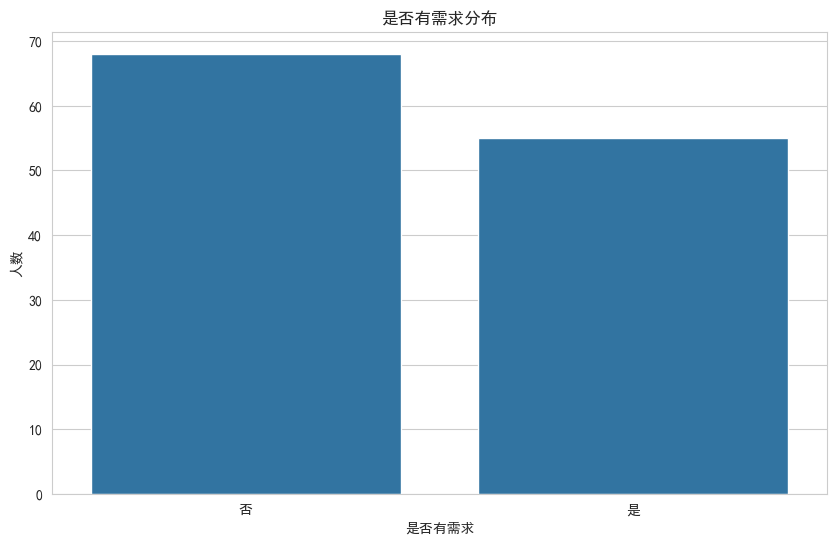

-----------------------------------------
是否知道平台
是    80
否    43
Name: count, dtype: int64
是否知道平台
是    0.650407
否    0.349593
Name: count, dtype: float64


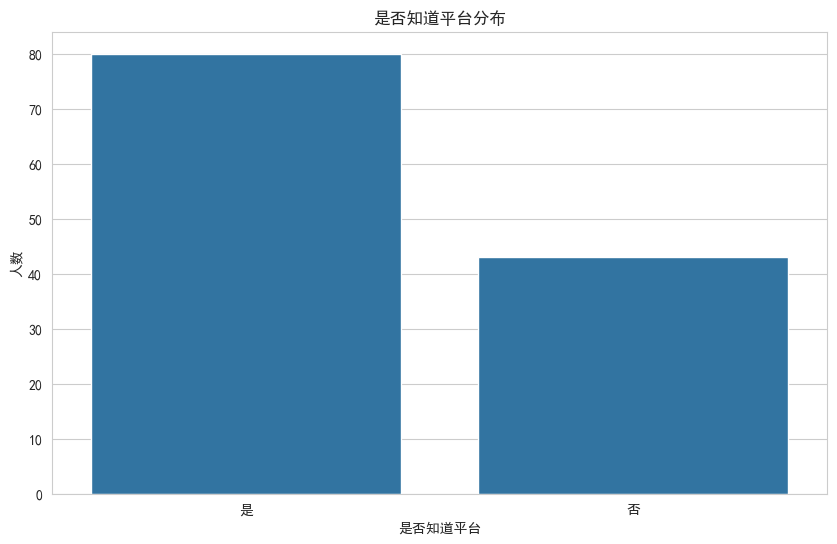

In [82]:
demand_counts = df_unused['是否有需求'].value_counts()
print(demand_counts)
print(demand_counts / df_unused.shape[0])
# 绘制是否有需求的分布
plt.figure(figsize=(10, 6))
sns.barplot(x=demand_counts.index, y=demand_counts.values)
plt.title('是否有需求分布')
plt.xlabel('是否有需求')
plt.ylabel('人数')
plt.show()


print("-----------------------------------------")
platform_knowledge_counts = df_unused['是否知道平台'].value_counts()
print(platform_knowledge_counts)
print(platform_knowledge_counts / df_unused.shape[0])
# 绘制是否知道平台的分布
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_knowledge_counts.index, y=platform_knowledge_counts.values)
plt.title('是否知道平台分布')
plt.xlabel('是否知道平台')
plt.ylabel('人数')
plt.show()


In [83]:
reasons_count = {}
for reasons in df_unused['不使用原因']:
    for reason in reasons.split('┋'):
        if reason in reasons_count:
            reasons_count[reason] += 1
        else:
            reasons_count[reason] = 1

print(reasons_count)
print("-----------------------------------------")

reasons = pd.Series(reasons_count).sort_values(ascending=False)
print(reasons)
print("-----------------------------------------")
reasons_rate = reasons / df_unused.shape[0]
print(reasons_rate)

{'不熟悉二手平台的交易流程': 71, '担心商品质量问题': 73, '售后保障方面的担忧': 62, '更倾向于购买全新的产品': 67, '通过qq等其他渠道进行交易': 29, '价格吸引力不足': 42, '缺少信任的品牌或平台': 45, '担心个人信息安全问题': 45}
-----------------------------------------
担心商品质量问题         73
不熟悉二手平台的交易流程     71
更倾向于购买全新的产品      67
售后保障方面的担忧        62
缺少信任的品牌或平台       45
担心个人信息安全问题       45
价格吸引力不足          42
通过qq等其他渠道进行交易    29
dtype: int64
-----------------------------------------
担心商品质量问题         0.593496
不熟悉二手平台的交易流程     0.577236
更倾向于购买全新的产品      0.544715
售后保障方面的担忧        0.504065
缺少信任的品牌或平台       0.365854
担心个人信息安全问题       0.365854
价格吸引力不足          0.341463
通过qq等其他渠道进行交易    0.235772
dtype: float64


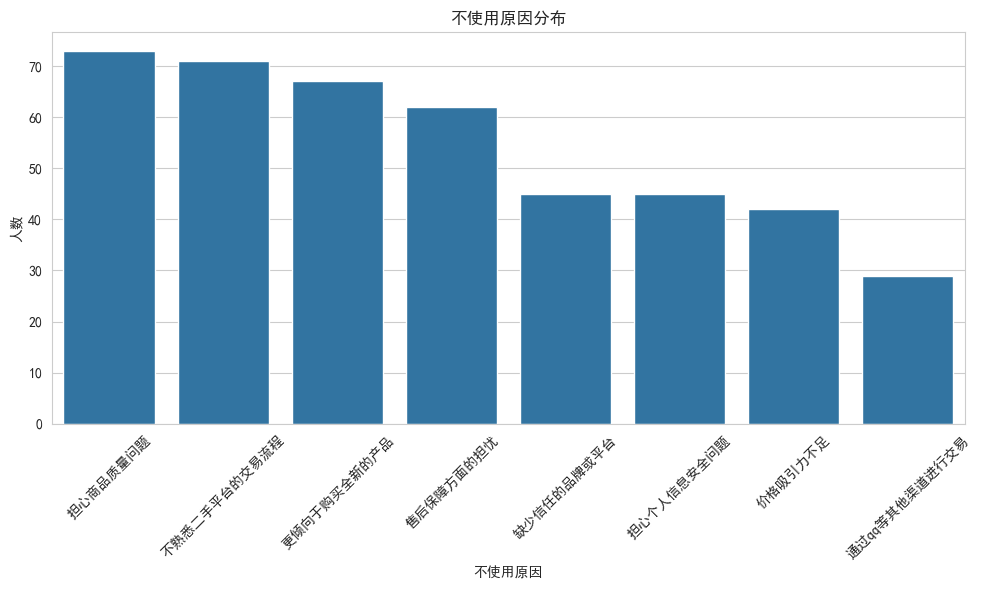

In [84]:
# 绘制不使用原因的分布
plt.figure(figsize=(10, 6))
sns.barplot(x=reasons.index, y=reasons.values)
plt.title('不使用原因分布')
plt.xlabel('不使用原因')
plt.ylabel('人数')
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示
plt.tight_layout()  # 调整布局以防止标签被截断
plt.show()

## 买家基本分析

In [85]:
df_buyers.columns

Index(['序号', '提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '总分', '1、您的性别为：',
       '2、您的年龄为：', '3、您的学历为：', '4、您目前从事的职业为：', '5、您的月收入区间为：',
       '6、您是否使用过二手交易平台？', '12、您倾向于购买什么类型的二手商品？', '12、书籍资料', '12、数码电器',
       '12、运动产品', '12、服饰配饰', '12、虚拟产品', '12、家具用品', '12、交通工具', '12、其它',
       '13、当您要购买二手商品时，以下因素对您来说有多重要？（分值越高表示越重要）—商品质量', '13、商品信息全面', '13、物流服务',
       '13、价格优惠', '13、商品销量', '13、售后服务', '14、您是否关注二手商品的原始购买渠道？',
       '15、您是否关注二手商品在平台上的价格波动情况？', '16、卖家在平台上的声誉会影响您是否选择与其交易吗？',
       '17、卖家的好评率对您的购买决策影响大吗？', '18、卖家的交易纠纷数量对您的购买决策影响大吗？',
       '19、您更关注卖家的声誉还是卖家自身的交易纠纷数量？', '20、卖家的售后服务对您的购买决策影响大吗？',
       '21、您认为应包含哪些售后服务？', '21、客户咨询响应', '21、商品使用指导', '21、提供维修信息',
       '21、一定期限内退换货', '22、您是否会因为担心个人信息安全问题，在二手平台上减少某些交易行为？',
       '23、店铺信誉造假、商品销量与评论造假等商品风险问题是否会影响您的购买决策？',
       '24、您是否遇到过平台上商品信息与实际收到商品严重不符的情形？', '25、您认为平台通过哪些方式可以减小交易风险？',
       '25、建立买卖双方交易信誉记录', '25、交易前缴纳适额保证金', '25、建立商品评级标准',
       '26、对于平台现有的纠纷处理时间周期，您是否满意？', '27、平台提供的商品筛选功能是否满足您的需求？',
       '28、您在使用二手平台购物的过程中，最满意

In [86]:
# 1. 买家购买的二手商品种类分布
# 2. 买家关注因素
df_buyers = df_buyers[['12、您倾向于购买什么类型的二手商品？', '13、商品信息全面', '13、物流服务', '13、价格优惠', '13、商品销量', '13、售后服务']]
df_buyers = df_buyers.rename(columns={'12、您倾向于购买什么类型的二手商品？': '商品类型', '13、商品信息全面': '商品信息全面', '13、物流服务': '物流服务', '13、价格优惠': '价格优惠', '13、商品销量': '商品销量', '13、售后服务': '售后服务'})
df_buyers

,商品类型,商品信息全面,物流服务,价格优惠,商品销量,售后服务
0,书籍资料,3,3,5,3,3
1,数码电器┋运动用品┋服饰配饰┋虚拟产品┋家居用品,4,4,5,5,5
2,书籍资料┋数码电器,3,3,4,2,2
3,书籍资料┋数码电器,5,4,5,3,4
4,服饰配饰┋家居用品,5,3,5,4,3
...,...,...,...,...,...,...
443,书籍资料,3,4,3,3,5
444,书籍资料┋数码电器,5,4,4,4,5
445,数码电器┋运动用品┋虚拟产品┋家居用品,3,3,3,3,4
446,书籍资料┋运动用品┋服饰配饰┋家居用品,2,3,3,2,2


In [87]:
goods_type = {}
for goods in df_buyers['商品类型']:
    for good in goods.split('┋'):
        if good in goods_type:
            goods_type[good] += 1
        else:
            goods_type[good] = 1
goods_count = pd.Series(goods_type).sort_values(ascending=False)
goods_trimmed = goods_count[goods_count > 10]
goods_trimmed

数码电器    294
书籍资料    280
运动用品    228
服饰配饰    191
虚拟产品    185
家居用品    178
交通工具    137
dtype: int64

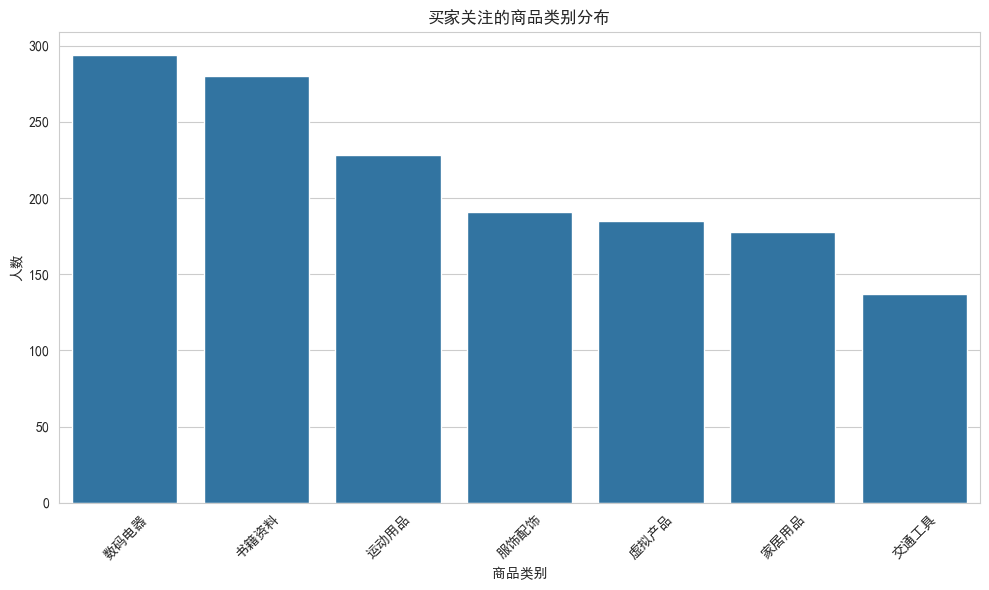

In [88]:
# 绘制买家关注类型
plt.figure(figsize=(10, 6))
sns.barplot(x=goods_trimmed.index, y=goods_trimmed.values)
plt.title('买家关注的商品类别分布')
plt.xlabel('商品类别')
plt.ylabel('人数')
plt.xticks(rotation=45)  # 旋转x轴标签以便更好地显示
plt.tight_layout()  # 调整布局以防止标签被截断
plt.show()

In [89]:
df_buyers = df_buyers.iloc[:, 1:]
df_buyers

,商品信息全面,物流服务,价格优惠,商品销量,售后服务
0,3,3,5,3,3
1,4,4,5,5,5
2,3,3,4,2,2
3,5,4,5,3,4
4,5,3,5,4,3
...,...,...,...,...,...
443,3,4,3,3,5
444,5,4,4,4,5
445,3,3,3,3,4
446,2,3,3,2,2


In [76]:

# 确保选择正确的评分列（根据数据实际列名调整）
rating_columns = ['商品信息全面', '物流服务', '价格优惠', '商品销量', '售后服务']

plt.figure(figsize=(10, 6))
sorted_means = df_buyers[rating_columns].mean().sort_values(ascending=False)
sns.barplot(x=sorted_means.values, 
            y=sorted_means.index, 
            palette="viridis",
            order=sorted_means.index,
            xerr=df_buyers[rating_columns].std())

plt.title('买家关注因素评分（均值±标准差）')
plt.xlabel('平均评分')
plt.xlim(0, 5.5)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 添加数值标注
for i, v in enumerate(sorted_means.values):
    plt.text(v + 0.1, i, f"{v:.1f}", color='black', ha='left', va='center')

plt.tight_layout()
plt.show()


KeyError: "None of [Index(['商品信息全面', '物流服务', '价格优惠', '商品销量', '售后服务'], dtype='object')] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

## 卖家

In [71]:
#### 卖家
# 1. 卖家身份分布
# 2. 卖家售卖商品种类分布
# 3. 动机分布
df_sellers.columns

Index(['序号', '提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '总分', '1、您的性别为：',
       '2、您的年龄为：', '3、您的学历为：', '4、您目前从事的职业为：', '5、您的月收入区间为：',
       '6、您是否使用过二手交易平台？', '30、您目前的卖家身份属于以下哪种类型？', '31、您主要出售的二手商品类型有哪些？',
       '30、书籍资料', '30、数码电器', '30、运动用品', '30、服饰配饰', '30、虚拟产品', '30、家居用品',
       '30、交通工具', '30、其他', '32、您出售二手商品的主要动机是什么？', '32、获取额外收入', '32、减少闲置商品',
       '32、支持环保或可持续消费', '32、为换够新物品筹集资金', '32、改善生活环境（如清理空间等）',
       '33、您认为二手平台与其他出售商品的渠道相比，优势是什么？', '33、平台受众人群广泛，成交率高',
       '33、平台受众人群广泛，成交率高.1', '33、平台提供销售决策帮助，如定价、查看买家信用等', '33、平台交易流程快，可以快速变现',
       '33、操作简便，易于上手', '34、您通常使用哪些二手平台？', '34、闲鱼', '34、转转', '34、爱回收', '34、得物',
       '34、红布林', '35、您是怎样作出定价这一销售决策的呢？', '36、在二手平台上销售时，您遇到过哪些信息搜集上的挑战？',
       '37、您认为平台可以通过哪些措施来提高买家的信任，从而提升您的销售转化率？',
       '38、二手平台收取服务费上涨，您认为这对您的交易意愿有何影响？',
       '39、假设您发现另一个收费更低，服务相似或更优的平台，您是否会考虑转移到该平台？', '40、您做出销售决策时，最重要的决定因素是什么？',
       '41、您在做销售决策时，平台能否提供需要的辅助决策工具？', '42、您在进行销售决策时会考虑通过什么方式吸引潜在买家？',
       '43、您是否觉得平台为你的商品提供了合适的曝光度？', '44、您在交易过程中遇到过哪些

In [90]:
df_sellers = df_sellers[['30、您目前的卖家身份属于以下哪种类型？', '31、您主要出售的二手商品类型有哪些？', '32、您出售二手商品的主要动机是什么？']].rename(columns={'30、您目前的卖家身份属于以下哪种类型？': '卖家身份', '31、您主要出售的二手商品类型有哪些？': '商品类型', '32、您出售二手商品的主要动机是什么？': '动机'})
df_sellers

,卖家身份,商品类型,动机
0,1,服饰配饰,减少闲置商品
1,1,书籍资料,支持环保或可持续消费
2,3,书籍资料┋运动用品┋交通工具,获取额外收入┋减少闲置商品┋为换购新物品筹集资金┋改善生活环境（如清理空间等）
3,3,书籍资料,获取额外收入┋减少闲置商品┋支持环保或可持续消费┋为换购新物品筹集资金
4,3,数码电器┋交通工具,改善生活环境（如清理空间等）
...,...,...,...
153,1,书籍资料┋数码电器┋虚拟产品┋家居用品┋交通工具,获取额外收入┋减少闲置商品┋支持环保或可持续消费┋为换购新物品筹集资金
154,1,书籍资料┋数码电器┋服饰配饰┋虚拟产品,支持环保或可持续消费┋为换购新物品筹集资金
155,2,书籍资料┋交通工具,获取额外收入┋减少闲置商品┋支持环保或可持续消费
156,3,书籍资料┋家居用品┋交通工具,获取额外收入┋减少闲置商品┋支持环保或可持续消费


卖家身份
1    78
2    49
3    31
Name: count, dtype: int64
卖家身份
1    0.493671
2    0.310127
3    0.196203
Name: count, dtype: float64


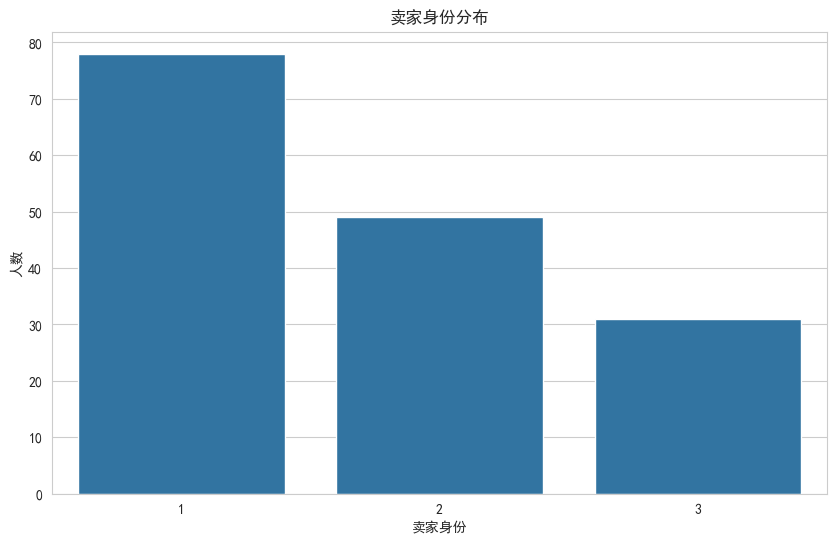

In [92]:
type_count = df_sellers['卖家身份'].value_counts()
print(type_count)
print(type_count / df_sellers.shape[0])
# 绘制卖家身份的分布
plt.figure(figsize=(10, 6))
sns.barplot(x=type_count.index, y=type_count.values)
plt.title('卖家身份分布')
plt.xlabel('卖家身份')
plt.ylabel('人数')
plt.show()

In [93]:
sell_goods_type = {}
for goods in df_sellers['商品类型']:
    for good in goods.split('┋'):
        if good in sell_goods_type:
            sell_goods_type[good] += 1
        else:
            sell_goods_type[good] = 1
sell_goods_count = pd.Series(goods_type).sort_values(ascending=False)
sell_goods_trimmed = sell_goods_count[sell_goods_count > 10]
sell_goods_trimmed

数码电器    294
书籍资料    280
运动用品    228
服饰配饰    191
虚拟产品    185
家居用品    178
交通工具    137
dtype: int64

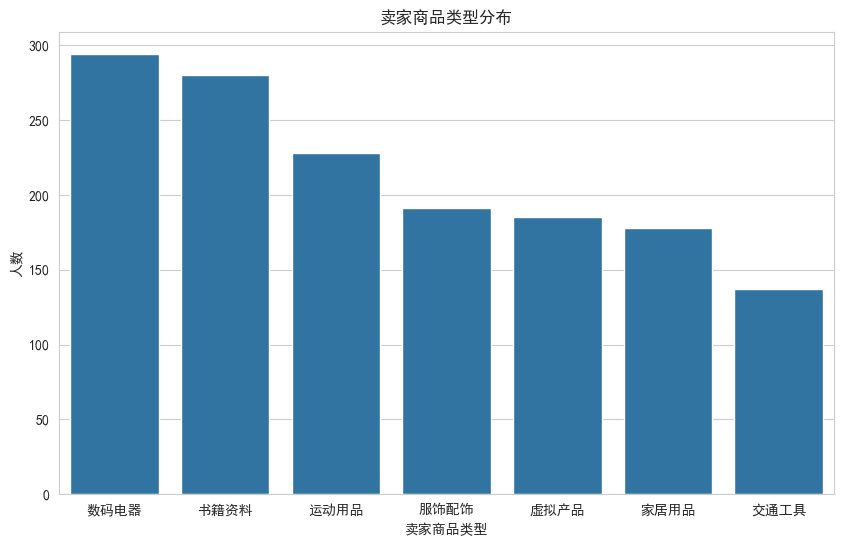

In [94]:
# 绘制卖家商品类型的分布
plt.figure(figsize=(10, 6))
sns.barplot(x=sell_goods_trimmed.index, y=sell_goods_trimmed.values)
plt.title('卖家商品类型分布')
plt.xlabel('卖家商品类型')
plt.ylabel('人数')
plt.show()

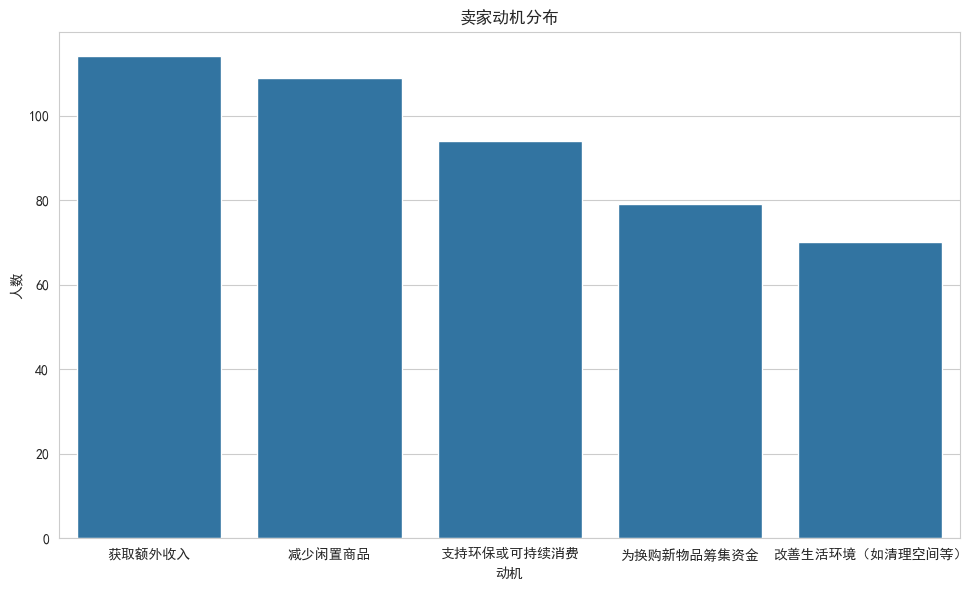

In [97]:
purpose = {}
for goods in df_sellers['动机']:
    for good in goods.split('┋'):
        if good in purpose:
            purpose[good] += 1
        else:
            purpose[good] = 1
purpose_count = pd.Series(purpose).sort_values(ascending=False)
purpose_trimmed = purpose_count[purpose_count > 10]

# 绘制动机的分布
plt.figure(figsize=(10, 6))

sns.barplot(x=purpose_trimmed.index, y=purpose_trimmed.values)
plt.title('卖家动机分布')
plt.xlabel('动机')
plt.ylabel('人数')
plt.tight_layout()
plt.show()